In [1]:
pip install ucimlrepo


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [3]:
import pandas as pd

In [4]:
X.shape

(48842, 14)

In [5]:
y.shape

(48842, 1)

In [6]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
y.describe()

,income
count,48842
unique,4
top,<=50K
freq,24720


<h2>Attribute Information</h2>

<h5><i>The attribute information below are from the description of the data.</i></h5>

__age__: continuous.

__workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

__fnlwgt__: continuous.

__education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

__education-num__: continuous.

__marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

__occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

__relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

__race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

__sex__: Female, Male.

__capital-gain__: continuous.

__capital-loss__: continuous.

__hours-per-week__: continuous.

__native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

__income__: >50K, <=50K

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [9]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [10]:
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

We can see that we have 4 classifications rather than two and we need to adjust the values to two. Either <=50K or >50K

In [11]:
y = y.replace({'<=50K.': '<=50K', '>50K.': '>50K'})
y.value_counts()


income
<=50K     37155
>50K      11687
Name: count, dtype: int64

The columns of the dataframe are what we expected based on the attribute information given by the text file of the data.

Columns where the data is continuous are int64 and the others are of type object.

In [12]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [13]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [14]:
X.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

Value counts for each column

In [15]:
for col in X.columns:
    print(f"Value counts for {col}:")
    print(X[col].value_counts())
    print("\n")

Value counts for age:
age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64


Value counts for workclass:
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


Value counts for fnlwgt:
fnlwgt
203488    21
120277    19
190290    19
125892    18
126569    18
          ..
374763     1
242136     1
26711      1
117909     1
159691     1
Name: count, Length: 28523, dtype: int64


Value counts for education:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th           

Missing values are represented by "?" by checking the value counts for the workclass, occupation, and native country columns.

Let's change the "?" values to NA. That way, isnull can identify those.

In [16]:
X.replace('?', pd.NA, inplace=True)
X.isnull().sum()

/tmp/ipykernel_403/2621118800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('?', pd.NA, inplace=True)


age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64

We can confirm that there are missing values in columns: workclass, occupation, and native-country.

<h2>Capital Gain & Captial Loss</h2>

Let's plot the distribution of __Captial Gain__.

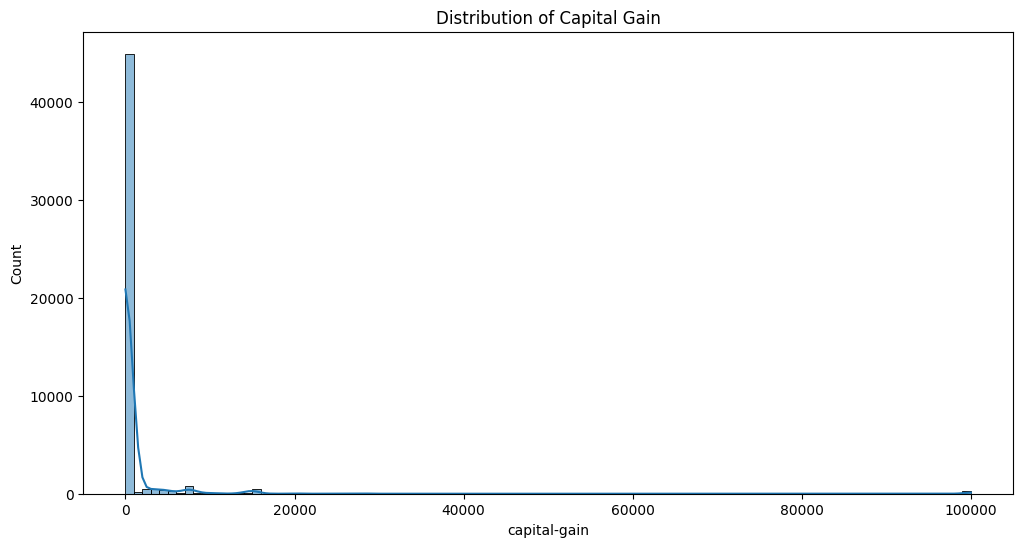

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(X['capital-gain'], bins=100, kde=True)
plt.title('Distribution of Capital Gain')
plt.show()

The __Captial Gain__ distribution plot shows a right-skewed distribution where most of the data is concentrated on the left with most of the values being 0.

In [ ]:
def categorize_capital_gain(value):
    if value == 0:
        return 'none'
    elif value < 10000:
        return 'low'
    elif value < 50000:
        return 'medium'
    else:
        return 'high'

X['capital-gain-category'] = X['capital-gain'].apply(categorize_capital_gain)
X.drop(columns=['capital-gain'], inplace=True)

print(X['capital-gain-category'].value_counts())

capital-gain-category
none      44807
low        2901
medium      890
high        244
Name: count, dtype: int64


We categorised the capital-gain column into none, low, medium, and high values

Let's plot the distribution of __Captial Loss__.

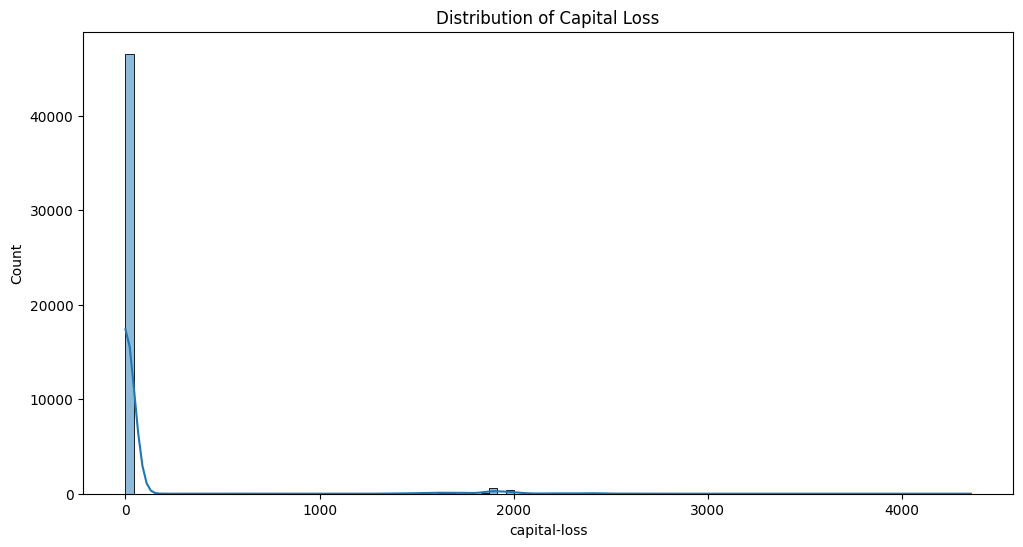

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(X['capital-loss'], bins=100, kde=True)
plt.title('Distribution of Capital Loss')
plt.show()

The __Captial Loss__ distribution plot shows a right-skewed distribution where most of the data is concentrated on the left with most of the values being 0.

In [ ]:
def categorize_capital_loss(value):
    if value == 0:
        return 'none'
    elif value < 1000:
        return 'low'
    elif value < 2000:
        return 'medium'
    else:
        return 'high'

X['capital-loss-category'] = X['capital-loss'].apply(categorize_capital_loss)
X.drop(columns=['capital-loss'], inplace=True)

print(X['capital-loss-category'].value_counts())

capital-loss-category
none      46560
medium     1746
high        491
low          45
Name: count, dtype: int64


We categorised the capital-loss feature into none, low, medium, and high values

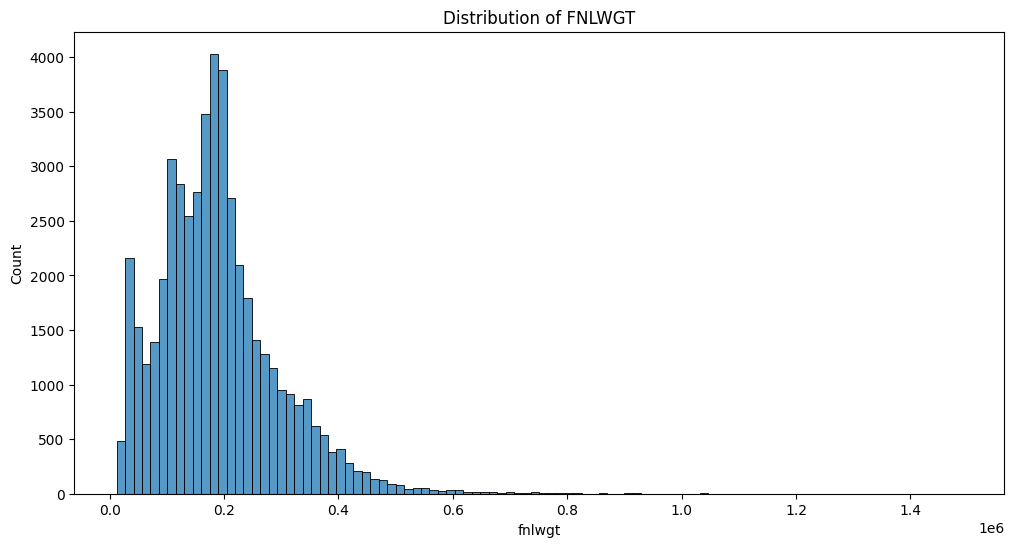

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(X['fnlwgt'], bins=100)
plt.title('Distribution of FNLWGT')
plt.show()

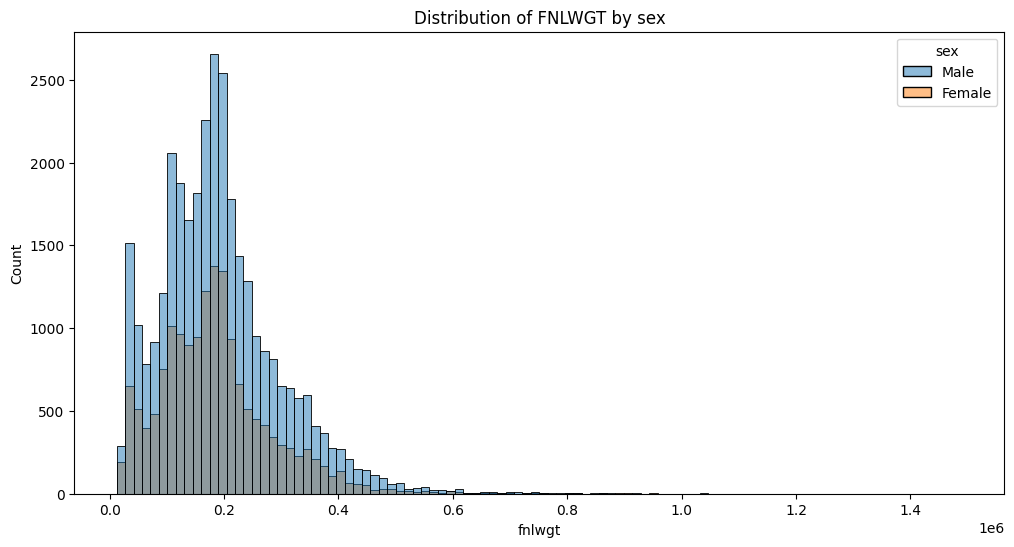

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(data=X, x='fnlwgt', hue='sex', bins=100)
plt.title('Distribution of FNLWGT by sex')
plt.show()

In [ ]:
X.loc[X['fnlwgt'] > 500000, 'fnlwgt'] = pd.NA

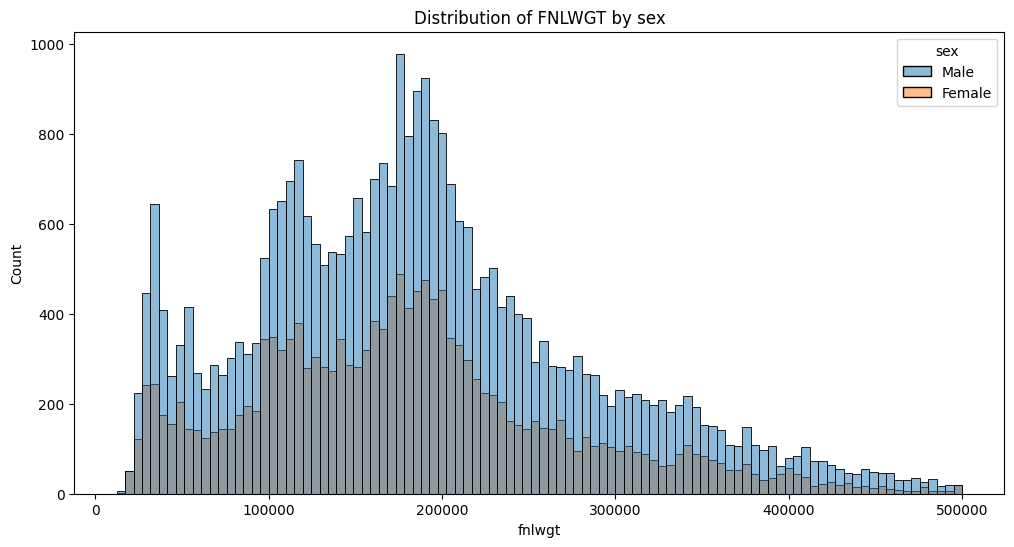

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=X, x='fnlwgt', hue='sex', bins=100)
plt.title('Distribution of FNLWGT by sex')
plt.show()

<h2>Correlation</h2>

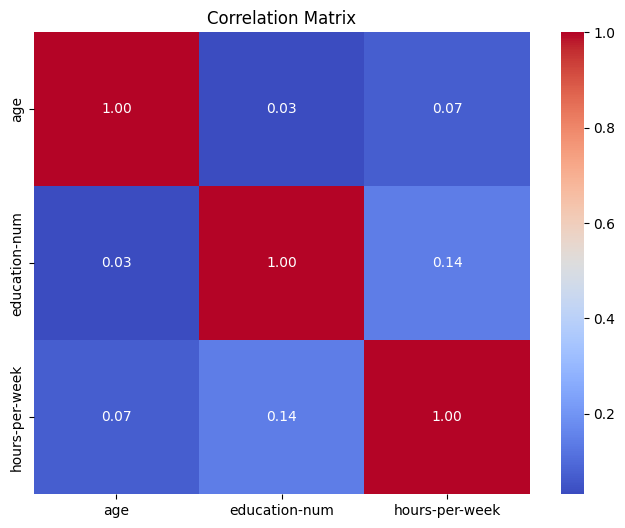

In [25]:
corr_matrix = X[['age', 'education-num', 'hours-per-week']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

The plot shows very low correlation between these three features.

0.03 between education-num and age.

0.07 between hours-per-week and age.

0.14 between education-num and hours-per-week (which is the highest between the three correlations)

In [26]:
pearson_corr = X[['education-num', 'hours-per-week']].corr(method='pearson')
print(pearson_corr)

                education-num  hours-per-week
education-num        1.000000        0.143689
hours-per-week       0.143689        1.000000


In [27]:
X_adj = X[['education-num', 'age', 'sex']].copy()
X_adj_male = X_adj[X_adj['sex'] == 'Male']
X_adj_female = X_adj[X_adj['sex'] == 'Female']

corr_matrix_male = X_adj_male[['education-num', 'age']].corr()
corr_matrix_female = X_adj_female[['education-num', 'age']].corr()

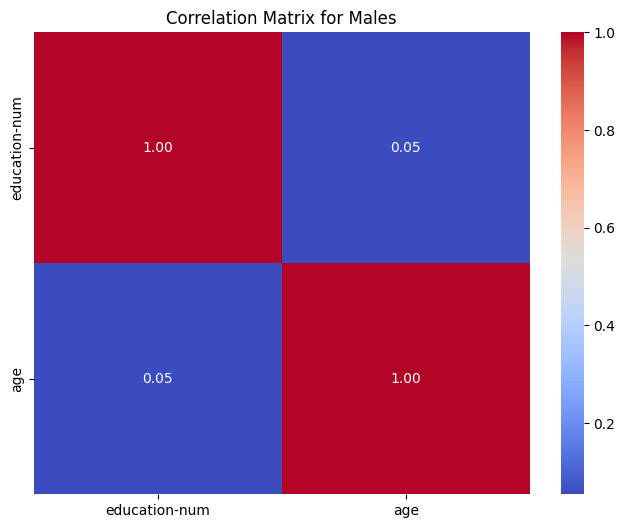

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_male, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Males')
plt.show()

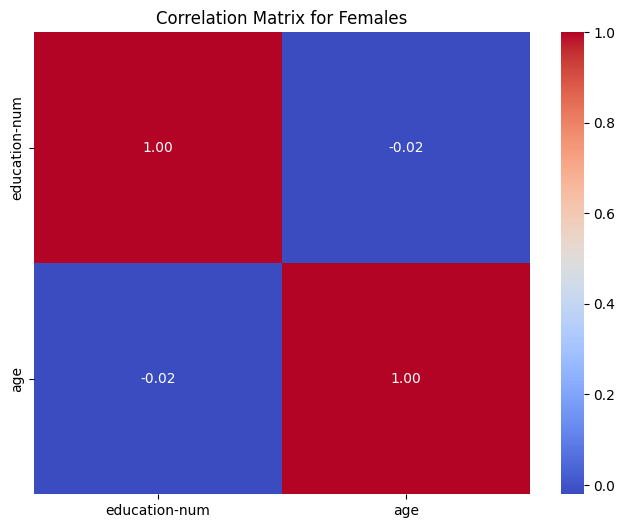

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_female, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Females')
plt.show()

Correlations between education-num and age in both Males and Females are week, however, in Females, the correlation is negative in contrast to the Male correlation which is positive.

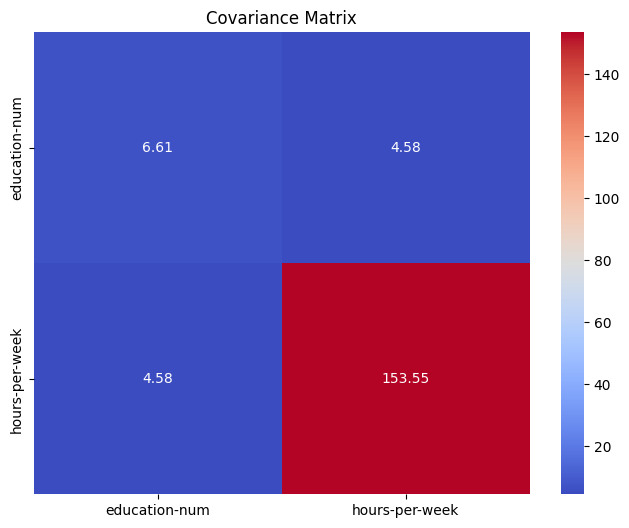

In [30]:
cov_matrix = X[['education-num', 'hours-per-week']].cov()

plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Covariance Matrix')
plt.show()

The covariance matrix supports what we saw above where the correlation was 0.14 between education-num and hours-per-week.

The covariance (4.58) represents a week but postive relationship between education-num and hours-per-week.

<h2>Regression Analysis</h2>

In [31]:
y = y.replace({'<=50K': 0, '>50K': 1})
print(y.value_counts())

income
0         37155
1         11687
Name: count, dtype: int64


/tmp/ipykernel_403/3985987392.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'<=50K': 0, '>50K': 1})


In [32]:
#replace missing values
X['workclass'].fillna(X['workclass'].mode()[0], inplace=True)
X['occupation'].fillna(X['occupation'].mode()[0], inplace=True)
X['native-country'].fillna(X['native-country'].mode()[0], inplace=True)
X['fnlwgt'].fillna(X['fnlwgt'].mean(), inplace=True)

from sklearn.preprocessing import OneHotEncoder, StandardScaler
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'capital-loss-category', 'capital-gain-category']])
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out())

X = pd.concat([X.drop(columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'capital-loss-category', 'capital-gain-category']), X_encoded_df], axis=1)

scaler = StandardScaler()
X[['age', 'fnlwgt', 'education-num', 'hours-per-week']] = scaler.fit_transform(X[['age', 'fnlwgt', 'education-num', 'hours-per-week']])

/tmp/ipykernel_403/3405107533.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['workclass'].fillna(X['workclass'].mode()[0], inplace=True)
/tmp/ipykernel_403/3405107533.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [33]:
print(X.head())

        age    fnlwgt  education-num  hours-per-week  workclass_Federal-gov  \
0  0.025996 -1.143375       1.136512       -0.034087                    0.0   
1  0.828308 -1.081613       1.136512       -2.213032                    0.0   
2 -0.046942  0.328783      -0.419335       -0.034087                    0.0   
3  1.047121  0.532080      -1.197259       -0.034087                    0.0   
4 -0.776316  1.637163       1.136512       -0.034087                    0.0   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                  0.0                     0.0                0.0   
1                  0.0                     0.0                0.0   
2                  0.0                     0.0                1.0   
3                  0.0                     0.0                1.0   
4                  0.0                     0.0                1.0   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  ...  \
0                     0.0                       

In [34]:
X.isnull().sum()

age                             0
fnlwgt                          0
education-num                   0
hours-per-week                  0
workclass_Federal-gov           0
                               ..
capital-loss-category_none      0
capital-gain-category_high      0
capital-gain-category_low       0
capital-gain-category_medium    0
capital-gain-category_none      0
Length: 111, dtype: int64

In [35]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8495240045040434
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      7431
           1       0.73      0.59      0.65      2338

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769

Confusion Matrix:
 [[6914  517]
 [ 953 1385]]
